In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import re
import sys
import os

In [2]:
df_routes=pd.read_parquet(r"..\..\dados\rotas_historico_categorizado.parquet")
df_historico_distancia=pd.read_parquet(r"..\..\dados\routes_dist_km_percorridos_historico.parquet")
# df_estacoes=pd.read_parquet(r"..\..\dados\estacoes_metro_e_trem.parquet")
df_trips=pd.read_parquet(r"..\..\dados\trips_historico.parquet")
df_stops=pd.read_parquet(r"..\..\dados\stops_historico_categorizado.parquet")
df_passageiros=pd.read_parquet(r"..\..\dados\passageiros_unificado.parquet")

In [3]:
df_trips=df_trips.merge(df_stops,on=['data_referencia', 'stop_id', 'stop_name','stop_desc', 'stop_lat', 'stop_lon'])

# Distância média das rotas de uma região

27.470716362660017


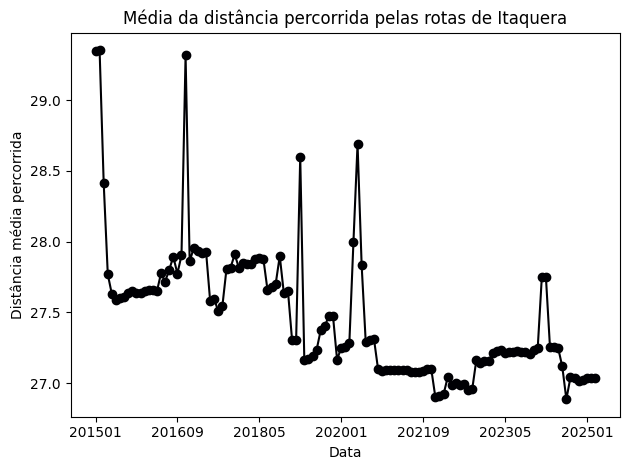

In [4]:
bairro='Itaquera'
routes_bairro=df_trips[df_trips.Distritos==bairro]['route_id'].drop_duplicates().to_list()
# plotar
print(df_historico_distancia[df_historico_distancia.route_id.isin(routes_bairro)]['distancia_km_percorrido'].mean())
df_historico_distancia[df_historico_distancia.route_id.isin(routes_bairro)].groupby("data_referencia")['distancia_km_percorrido'].mean().plot(marker="o",colormap='magma')

plt.xlabel("Data")
plt.ylabel("Distância média percorrida")
plt.title(f"Média da distância percorrida pelas rotas de {bairro}")
plt.tight_layout()
plt.show()

# Distância média das rotas de São Paulo

23.63488614673226


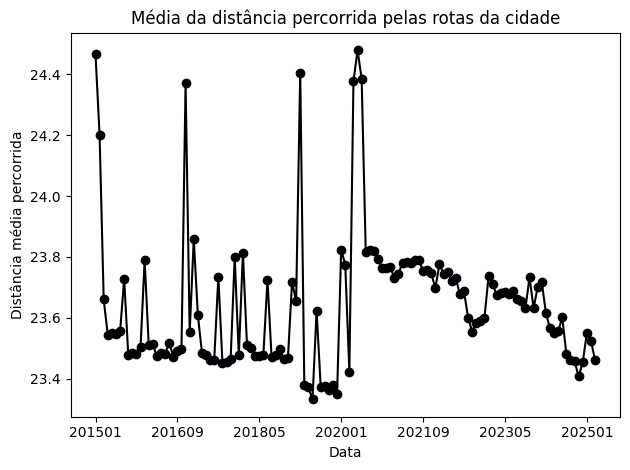

In [5]:
print(df_historico_distancia['distancia_km_percorrido'].mean())

df_historico_distancia.groupby("data_referencia")['distancia_km_percorrido'].mean().plot(marker="o",colormap='magma')

plt.xlabel("Data")
plt.ylabel("Distância média percorrida")
plt.title(f"Média da distância percorrida pelas rotas da cidade")
plt.tight_layout()
plt.show()

# Qtd de passageiros em uma região

In [6]:
passageiros_filtrado.groupby("route_id")['passageiros_total'].sum().sort_values()

NameError: name 'passageiros_filtrado' is not defined

C:\Users\franc\AppData\Local\Temp\ipykernel_12328\1720873573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passageiros_filtrado['data']=passageiros_filtrado['data'].dt.to_period('M')


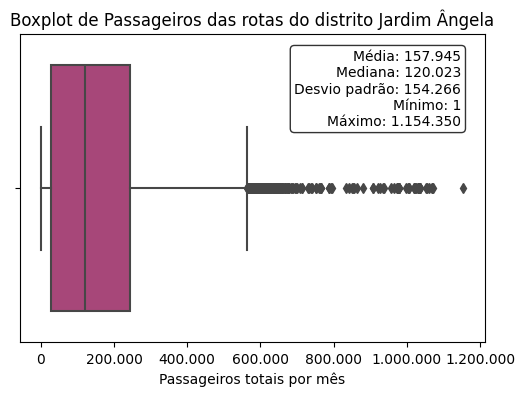

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

rotas_filtradas=df_trips[df_trips.Distritos.str.contains("Jardim Ângela")]['route_id'].drop_duplicates().to_list()
passageiros_filtrado=df_passageiros[df_passageiros.route_id.isin(rotas_filtradas)]
passageiros_filtrado['data']=passageiros_filtrado['data'].dt.to_period('M')
passageiros_filtrado=passageiros_filtrado.groupby(["data",'route_id']).sum().reset_index()

# Cria o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=passageiros_filtrado['passageiros_total'],palette='magma')
# Título e rótulos
plt.title('Boxplot de Passageiros das rotas do distrito Jardim Ângela')
plt.xlabel('Passageiros totais por mês')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))


# Calcular estatísticas
media = passageiros_filtrado['passageiros_total'].mean()
mediana = passageiros_filtrado['passageiros_total'].median()
desvio = passageiros_filtrado['passageiros_total'].std()
minimo = passageiros_filtrado['passageiros_total'].min()
maximo = passageiros_filtrado['passageiros_total'].max()

# Mostrar estatísticas no gráfico
texto = (
    f"Média: {media:,.0f}\n"
    f"Mediana: {mediana:,.0f}\n"
    f"Desvio padrão: {desvio:,.0f}\n"
    f"Mínimo: {minimo:,.0f}\n"
    f"Máximo: {maximo:,.0f}"
).replace(",", ".")

plt.text(
    0.95, 0.95, texto,
    transform=plt.gca().transAxes,
    fontsize=10, va='top', ha='right',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)


plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_17500\2778045007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passageiros_filtrado['data']=passageiros_filtrado['data'].dt.to_period('M')


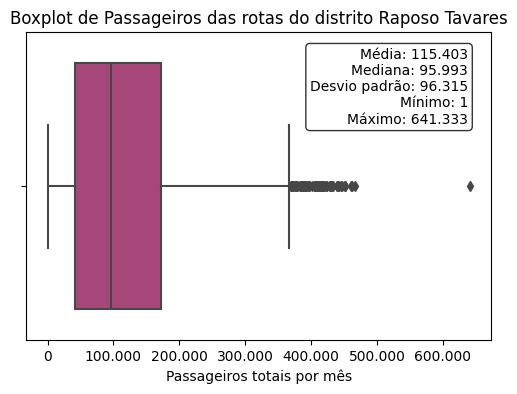

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

rotas_filtradas=df_trips[df_trips.Distritos.str.contains("Raposo Tavares")]['route_id'].drop_duplicates().to_list()
passageiros_filtrado=df_passageiros[df_passageiros.route_id.isin(rotas_filtradas)]
passageiros_filtrado['data']=passageiros_filtrado['data'].dt.to_period('M')
passageiros_filtrado=passageiros_filtrado.groupby(["data",'route_id']).sum().reset_index()

# Cria o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=passageiros_filtrado['passageiros_total'],palette='magma')
# Título e rótulos
plt.title('Boxplot de Passageiros das rotas do distrito Raposo Tavares')
plt.xlabel('Passageiros totais por mês')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))


# Calcular estatísticas
media = passageiros_filtrado['passageiros_total'].mean()
mediana = passageiros_filtrado['passageiros_total'].median()
desvio = passageiros_filtrado['passageiros_total'].std()
minimo = passageiros_filtrado['passageiros_total'].min()
maximo = passageiros_filtrado['passageiros_total'].max()

# Mostrar estatísticas no gráfico
texto = (
    f"Média: {media:,.0f}\n"
    f"Mediana: {mediana:,.0f}\n"
    f"Desvio padrão: {desvio:,.0f}\n"
    f"Mínimo: {minimo:,.0f}\n"
    f"Máximo: {maximo:,.0f}"
).replace(",", ".")

plt.text(
    0.95, 0.95, texto,
    transform=plt.gca().transAxes,
    fontsize=10, va='top', ha='right',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)


plt.show()